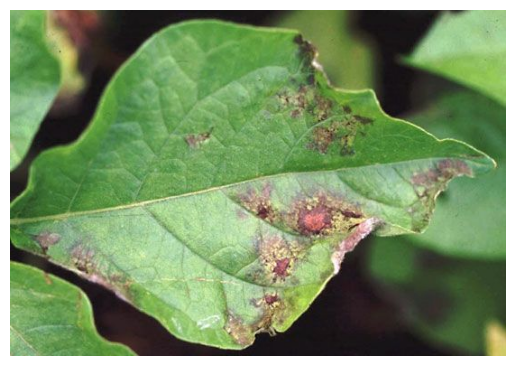

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Disease: Tomato___healthy


In [15]:
import requests
from io import BytesIO
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


model = load_model('my_model.h5')


disease_classes = ['Tomato___Late_blight', 'Tomato___healthy', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Potato___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Tomato___Early_blight', 'Tomato___Septoria_leaf_spot', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Strawberry___Leaf_scorch', 'Peach___healthy', 'Apple___Apple_scab', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Bacterial_spot', 'Apple___Black_rot', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Peach___Bacterial_spot', 'Apple___Cedar_apple_rust', 'Tomato___Target_Spot', 'Pepper,_bell___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Potato___Late_blight', 'Tomato___Tomato_mosaic_virus', 'Strawberry___healthy', 'Apple___healthy', 'Grape___Black_rot', 'Potato___Early_blight', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Common_rust_', 'Grape___Esca_(Black_Measles)', 'Raspberry___healthy', 'Tomato___Leaf_Mold', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Pepper,_bell___Bacterial_spot', 'Corn_(maize)___healthy']

# Function to load and preprocess the image from a URL
def load_image_from_url(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    return img

# Define the image URL
img_url = "https://cdn.britannica.com/89/126689-004-D622CD2F/Potato-leaf-blight.jpg"

# Load the image from the URL
img = load_image_from_url(img_url)

# Display the image using matplotlib
plt.imshow(img)
plt.axis('off')
plt.show()

# Preprocess the image (resize and scale)
img = img.resize((224, 224))  # Resize to match the model's input shape
img_array = image.img_to_array(img)  # Convert the image to a numpy array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize the image (if the model was trained with normalized images)

# Predict the image using the model
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)  # Get the index of the highest prediction

# Output the classification
print("Predicted Disease:", disease_classes[predicted_class[0]])
